In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerTuple

## 构建数据

In [2]:
provinces = ['BJ', 'TJ', 'HE', 'SX', 'IM', 'LN', 'JL', 'HL', 'SH', 'JS', 'ZJ', 'AH', 'FJ', 
             'JX', 'SD', 'HA', 'HB', 'HN', 'GD', 'GX', 'HI', 'CQ', 'SC', 'GZ', 'YN', 'XZ', 
             'SN', 'GS', 'QH', 'NX', 'XJ']
years = [2000, 2010, 2020]
np.random.seed(42)

# 生成粮食产量（递增趋势，单位：10⁴ 吨）
grain_yield = pd.DataFrame(index=provinces)
for year_idx, year in enumerate(years):
    base = 1000 + year_idx * 800
    grain_yield[year] = np.random.uniform(base, base + 2000, len(provinces))

# 生成播种面积（单位：10³ 公顷），每年仅两个值 > 8000，其余 < 4000
grain_area = pd.DataFrame(index=provinces)
for year in years:
    area_values = np.random.uniform(1000, 4000, len(provinces))
    high_idx = np.random.choice(len(provinces), size=2, replace=False)
    area_values[high_idx] = np.random.uniform(8000, 10000, size=2)
    grain_area[year] = area_values

In [3]:
grain_yield.head()

,2000,2010,2020
BJ,1749.080238,2141.048247,4257.475018
TJ,2901.428613,1930.103186,3313.506653
HE,2463.987884,3697.771075,3161.869019
SX,2197.316968,3731.264066,3685.392166
IM,1312.037281,3416.794696,2881.848450


In [4]:
grain_yield.describe()

,2000,2010,2020
count,31.000000,31.000000,31.000000
mean,1888.094388,2764.168353,3593.443708
std,558.627918,651.616079,606.201659
min,1041.168989,1868.777042,2611.044234
25%,1383.078292,2180.837318,3079.650191
50%,1863.890037,2680.304987,3685.392166
75%,2219.397747,3383.530171,4132.055395
max,2939.819704,3739.169256,4573.773873


In [5]:
grain_area.head()

,2000,2010,2020
BJ,2683.831593,1854.521483,2213.524381
TJ,3312.901540,1110.660842,3663.310296
HE,2481.386789,2828.693002,3552.785346
SX,2568.198488,2508.037070,3806.904983
IM,2282.623055,1154.436254,3356.021953


In [6]:
grain_area.describe()

,2000,2010,2020
count,31.000000,31.000000,31.000000
mean,2816.967871,2757.229662,3152.956973
std,1807.870484,2024.793384,1824.895638
min,1076.257380,1049.763487,1054.226091
25%,1717.135592,1696.199979,2108.127327
50%,2525.712073,2508.037070,2769.612543
75%,3367.611003,2975.962507,3690.803330
max,8994.497012,9712.648584,9702.273343


## 绘制

### 参数设置

In [7]:
angles = np.linspace(0, 2 * np.pi, len(provinces), endpoint=False).tolist()  # 极坐标角度
scatter_y = [2000, 3500, 5500]  # 散点图的y
base_values = 2000  # 填充底座
# 设置颜色
colors = {
    2000: '#a8e5d0',  
    2010: '#aaa0eb',  
    2020: '#aec1e3',  
}

### 制图

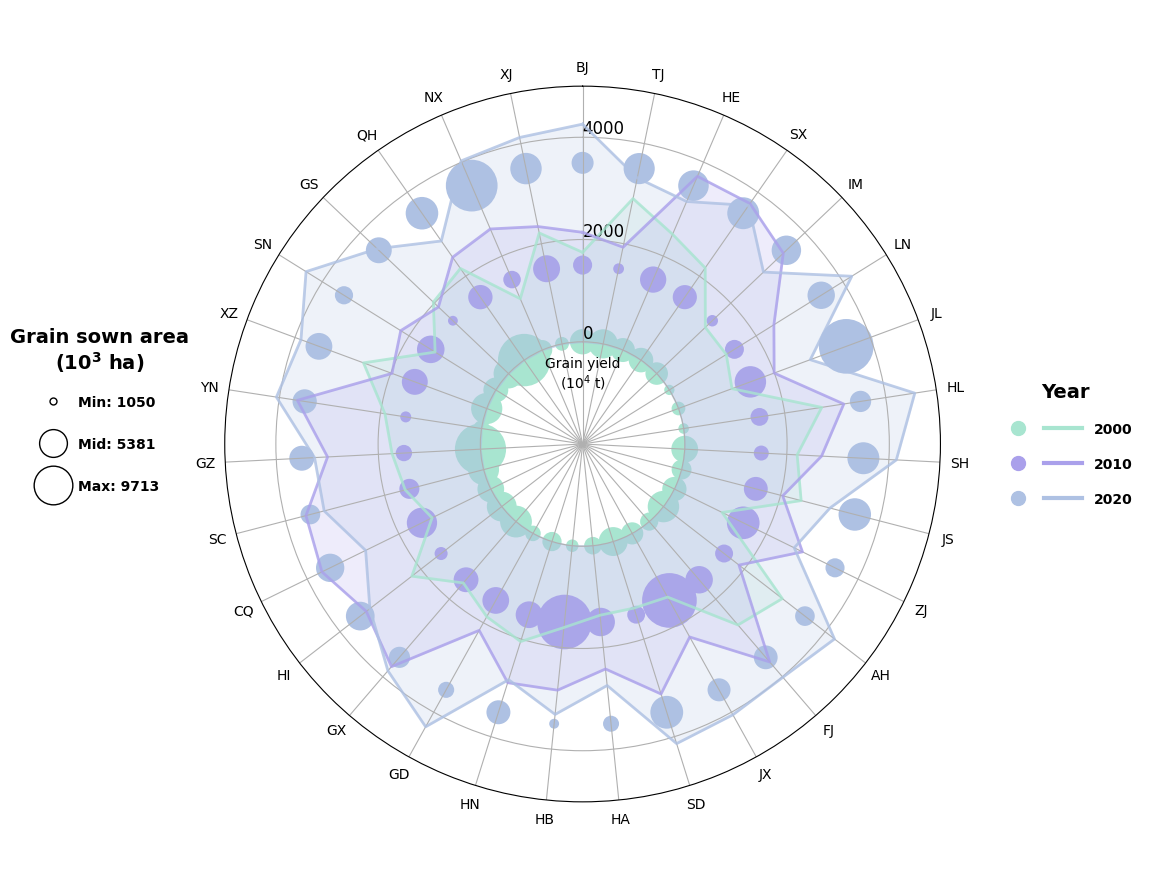

In [8]:
# 创建(1,3)子图布局
fig, axes = plt.subplots(1, 3, figsize=(12, 9), gridspec_kw={'width_ratios': [1, 4, 1]})  # 中间图更大

# 禁用左右子图的坐标轴显示
axes[0].axis('off')
axes[1].axis('off')
axes[2].axis('off')

# 获取中间子图作为极坐标图
ax = axes[1]
ax = fig.add_subplot(132, polar=True)

ax.set_theta_offset(np.pi / 2)  # 0度朝北（上）
ax.set_theta_direction(-1)  # 顺时针方向
ax.set_ylim(2000, 7000)  # y轴范围

# 散点缩放
def scale_area(area):
    return (area - global_area_min) / (global_area_max - global_area_min) * 1500 + 50

all_areas = np.concatenate([grain_area[year].values for year in years])
global_area_min = all_areas.min()
global_area_max = all_areas.max()

# 绘制数据
for index, year in enumerate(years):
    # 产量线与填充（不变）
    values = grain_yield[year].values.tolist()
    values += values[:1]  # 闭合曲线
    values = [value + 2000 for value in values]
    angle_closed = angles + angles[:1]  # 闭合角度，与values长度匹配
    ax.plot(angle_closed, values, label=str(year), color=colors[year], linewidth=2, alpha=0.8)
    ax.fill_between(angle_closed, base_values, values, color=colors[year], alpha=0.2)

    area = grain_area[year].values
    area_scaled = scale_area(area)
    for i in range(len(provinces)):
        ax.scatter(
            angles[i], scatter_y[index],
            s=area_scaled[i],
            color=colors[year],
            alpha=1,
            edgecolors='None'
        )

# 设置刻度
ax.set_xticks(angles)
ax.set_xticklabels(provinces, fontsize=10)
ax.set_rlabel_position(0)  # 将径向标签放在0度位置
ax.set_yticks([0, 2000, 4000, 6000])
ax.set_yticklabels(['', '0', '2000', '4000'], fontsize=12)

# y说明
ax.text(0, 1500, 'Grain yield', ha='center', fontsize=10)
ax.text(0, 1100, r'($\mathdefault{10^{4}}$ t)', ha='center', fontsize=10)

# 年份图例 - 放置在左子图
yield_legend_elements = [
    (
        plt.Line2D([0], [0], color=colors[y], marker='o', markerfacecolor=colors[y], markersize=10, lw=0),
        plt.Line2D([0], [0], color=colors[y], lw=3)
    ) 
    for y in years
]
axes[2].legend(
    title='Year',
    handles=yield_legend_elements,
    labels=[str(y) for y in years],
    handler_map={tuple: HandlerTuple(ndivide=None, pad=0.5)},
    loc='center',
    fontsize=12,
    prop={'weight': 'bold'},
    handlelength=6,  # 控制图例项的总长度
    handletextpad=0.8,  # 控制图例标记和文本之间的间距
    labelspacing=1.5,  # 标签上下间距
    title_fontproperties={'size': 14, 'weight': 'bold'},
    frameon=False
)

# 面积等级图例 
global_area_mid = (global_area_min + global_area_max) / 2  # 中间值
area_sizes = [scale_area(global_area_min), scale_area(global_area_mid), scale_area(global_area_max)]  # 计算三个关键值的缩放大小
area_labels = [f'Min: {global_area_min:.0f}', f'Mid: {global_area_mid:.0f}', f'Max: {global_area_max:.0f}']
area_legend_elements = [
    plt.Line2D(
        [0], [0], 
        marker='o', 
        markersize=np.sqrt(size/2),  # 调整大小以匹配视觉效果
        markerfacecolor='none',  # 无填充
        markeredgecolor='black',  # 边缘颜色为黑色
        markeredgewidth=1,  # 边缘线宽
        lw=0,  # 主线宽为0（只显示标记）
        label=label
    )
    for size, label in zip(area_sizes, area_labels)
]
axes[0].legend(
    # title=s,
    handles=area_legend_elements,
    loc='center',
    fontsize=12,
    prop={'weight': 'bold'},
    frameon=False,
    labelspacing=2
)
title_text = 'Grain sown area\n($\mathdefault{10^{3}}$ ha)'
axes[0].text(
    0.5, 0.58,
    title_text,
    ha='center',  # 水平居中
    va='bottom',  # 垂直底部对齐（靠近图例）
    fontweight='bold',
    fontsize=14,
    transform=axes[0].transAxes  # 使用子图坐标系
)


plt.tight_layout()
plt.subplots_adjust(wspace=0.1)  # 调整子图间距
plt.show()